In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras import regularizers
from tensorflow.keras import metrics
from tensorflow.keras.utils import plot_model

In [5]:
!wget http://files.grouplens.org/datasets/movielens/ml-latest-small.zip

--2025-03-27 13:52:33--  http://files.grouplens.org/datasets/movielens/ml-latest-small.zip
Resolving files.grouplens.org (files.grouplens.org)... 128.101.65.152
Connecting to files.grouplens.org (files.grouplens.org)|128.101.65.152|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 978202 (955K) [application/zip]
Saving to: ‘ml-latest-small.zip’

ml-latest-small.zip 100%[===================>] 955.28K  4.33MB/s    in 0.2s    

2025-03-27 13:52:33 (4.33 MB/s) - ‘ml-latest-small.zip’ saved [978202/978202]



In [6]:
!unzip ml-latest-small.zip

Archive:  ml-latest-small.zip
   creating: ml-latest-small/
  inflating: ml-latest-small/links.csv  
  inflating: ml-latest-small/tags.csv  
  inflating: ml-latest-small/ratings.csv  
  inflating: ml-latest-small/README.txt  
  inflating: ml-latest-small/movies.csv  


In [7]:
movies=pd.read_csv('ml-latest-small/movies.csv')
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [8]:
ratings=pd.read_csv('ml-latest-small/ratings.csv')
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [9]:
pd.crosstab(ratings['userId'],ratings['movieId']).head()

movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,
1,1,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
k=15
g=ratings.groupby('userId')['rating'].count()
top_users=g.sort_values(ascending=False)[:k]

g=ratings.groupby('movieId')['rating'].count()
top_movies=g.sort_values(ascending=False)[:k]

top_r=ratings.join(top_users,rsuffix='_users',how='inner',on='userId')
top_r=top_r.join(top_movies,rsuffix='_movies',how='inner',on='movieId')

pd.crosstab(top_r['userId'],top_r['movieId'],top_r['rating'],aggfunc=np.sum)

<ipython-input-10-455242a16437>:11: FutureWarning: The provided callable <function sum at 0x7e664efc82c0> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  pd.crosstab(top_r['userId'],top_r['movieId'],top_r['rating'],aggfunc=np.sum)


movieId,1,50,110,260,296,318,356,480,527,589,593,1196,2571,2858,2959
userId,,,,,,,,,,,,,,,
68,2.5,3.0,2.5,5.0,2.0,3.0,3.5,3.5,4.0,3.5,3.5,5.0,4.5,5.0,2.5
182,4.0,4.5,3.5,3.5,5.0,4.5,5.0,3.5,4.0,2.0,4.5,3.0,5.0,5.0,5.0
249,4.0,4.0,5.0,5.0,4.0,4.5,4.5,4.0,4.5,4.0,4.0,5.0,5.0,4.5,5.0
274,4.0,4.0,4.5,3.0,5.0,4.5,4.5,3.5,4.0,4.5,4.0,4.5,4.0,5.0,5.0
288,4.5,NaN,5.0,5.0,5.0,5.0,5.0,2.0,5.0,4.0,5.0,4.5,3.0,NaN,3.5
307,4.0,4.5,3.5,3.5,4.5,4.5,4.0,3.5,4.5,2.5,4.5,3.0,3.5,4.0,4.0
380,5.0,4.0,4.0,5.0,5.0,3.0,5.0,5.0,NaN,5.0,5.0,5.0,4.5,NaN,4.0
387,NaN,4.5,3.5,4.5,5.0,3.5,4.0,3.0,NaN,3.5,4.0,4.5,4.0,4.5,4.5
414,4.0,5.0,5.0,5.0,5.0,5.0,5.0,4.0,4.0,5.0,4.0,5.0,5.0,5.0,5.0


In [11]:
user_enc=LabelEncoder()
ratings['user']=user_enc.fit_transform(ratings['userId'].values)
n_users=ratings['user'].nunique()

item_enc=LabelEncoder()
ratings['movie']=item_enc.fit_transform(ratings['movieId'].values)
n_movies=ratings['movie'].nunique()

ratings['rating']=ratings['rating'].values.astype(np.float32)
min_rating=min(ratings['rating'])
max_rating=max(ratings['rating'])

n_users,n_movies,min_rating,max_rating

(610, 9724, 0.5, 5.0)

In [12]:
ratings.head()

,userId,movieId,rating,timestamp,user,movie
0,1,1,4.0,964982703,0,0
1,1,3,4.0,964981247,0,2
2,1,6,4.0,964982224,0,5
3,1,47,5.0,964983815,0,43
4,1,50,5.0,964982931,0,46


In [13]:
X=ratings[['user','movie']].values
y=ratings['rating'].values

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=42)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(90752, 2) (10084, 2) (90752,) (10084,)


Model: "functional_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2             │ (None, 1)              │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_layer_3             │ (None, 1)              │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_4 (Embedding)   │ (None, 1, 50)          │         30,500 │ input_layer_2[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_6 (Embedding)   │ (None, 1, 50)          │        486,200 │ input_layer_3[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ reshape_32 (Reshape)      │ (None, 50)             │              0 │ embedding_4[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ reshape_34 (Reshape)      │ (None, 50)             │              0 │ embedding_6[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_5 (Embedding)   │ (None, 1, 1)           │            610 │ input_layer_2[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_7 (Embedding)   │ (None, 1, 1)           │          9,724 │ input_layer_3[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dot_1 (Dot)               │ (None, 1)              │              0 │ reshape_32[0][0],      │
│                           │                        │                │ reshape_34[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ reshape_33 (Reshape)      │ (None, 1)              │              0 │ embedding_5[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ reshape_35 (Reshape)      │ (None, 1)              │              0 │ embedding_7[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_4 (Add)               │ (None, 1)              │              0 │ dot_1[0][0],           │
│                           │                        │                │ reshape_33[0][0],      │
│                           │                        │                │ reshape_35[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_8 (Activation) │ (None, 1)              │              0 │ add_4[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lambda_8 (Lambda)         │ (None, 1)              │              0 │ activation_8[0][0]     │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 527,034 (2.01 MB)

 Trainable params: 527,034 (2.01 MB)

 Non-trainable params: 0 (0.00 B)

None


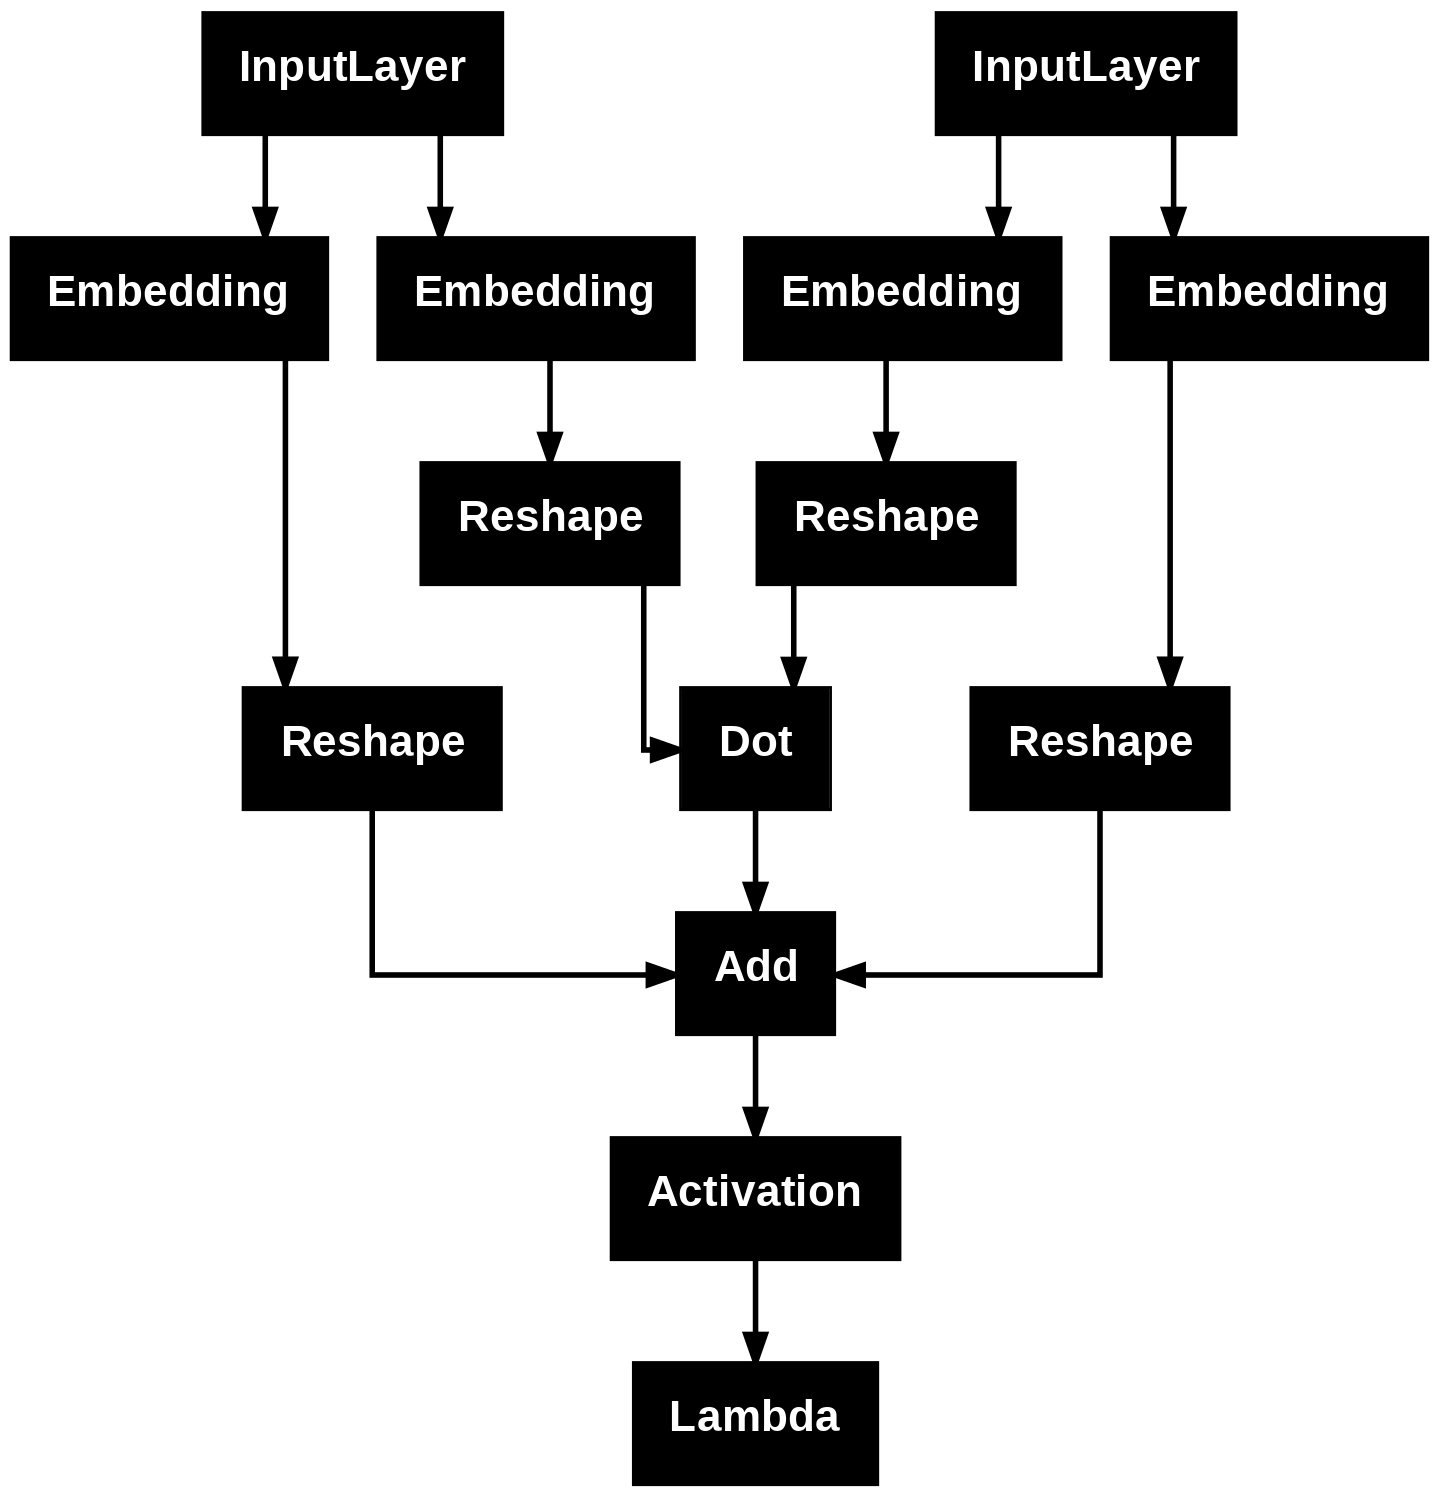

In [39]:
# Number of latent factors
emb_sz = 50

# User embeddings
user = layers.Input(shape=(1,))
user_emb = layers.Embedding(n_users, emb_sz, embeddings_regularizer=regularizers.l2(1e-6))(user)
user_emb = layers.Reshape((emb_sz,))(user_emb)

# User bias
user_bias = layers.Embedding(n_users, 1, embeddings_regularizer=regularizers.l2(1e-6))(user)
user_bias = layers.Reshape((1,))(user_bias)

# Movie embeddings
movie = layers.Input(shape=(1,))
movie_emb = layers.Embedding(n_movies, emb_sz, embeddings_regularizer=regularizers.l2(1e-6))(movie)
movie_emb = layers.Reshape((emb_sz,))(movie_emb)

# Movie bias
movie_bias = layers.Embedding(n_movies, 1, embeddings_regularizer=regularizers.l2(1e-6))(movie)
movie_bias = layers.Reshape((1,))(movie_bias)

# Dot product
rating = layers.Dot(axes=1)([user_emb, movie_emb])

# Add biases
rating = layers.Add()([rating, user_bias, movie_bias])
rating = layers.Activation('sigmoid')(rating)
rating = layers.Lambda(lambda x:x*(max_rating - min_rating) + min_rating)(rating)

# Model
model = models.Model([user, movie], rating)

model.compile(
    loss='mse',
    metrics=[metrics.RootMeanSquaredError()],
    optimizer=optimizers.Adam(learning_rate=0.001)
)

# Show model summary
print(model.summary())
plot_model(model, to_file='model.png')

In [43]:
model.fit(x=[X_train[:,0], X_train[:,1]], y=y_train,
          batch_size=64, epochs=8, verbose=1,
          validation_data=([X_test[:,0], X_test[:,1]], y_test))

Epoch 1/8
1418/1418 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - loss: 0.0482 - root_mean_squared_error: 0.1812 - val_loss: 1.0357 - val_root_mean_squared_error: 1.0100
Epoch 2/8
1418/1418 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - loss: 0.0470 - root_mean_squared_error: 0.1775 - val_loss: 1.0428 - val_root_mean_squared_error: 1.0135
Epoch 3/8
1418/1418 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - loss: 0.0458 - root_mean_squared_error: 0.1739 - val_loss: 1.0516 - val_root_mean_squared_error: 1.0178
Epoch 4/8
1418/1418 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - loss: 0.0451 - root_mean_squared_error: 0.1713 - val_loss: 1.0573 - val_root_mean_squared_error: 1.0206
Epoch 5/8
1418/1418 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - loss: 0.0451 - root_mean_squared_error: 0.1712 - val_loss: 1.0632 - val_root_mean_squared_error: 1.0234
Epoch 6/8
1418/1418 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - loss: 0.0440 - root_mean_squared_error: 0.1678 - val_loss: 1.0697 - val_root_mean_squared_error: 1.0265
Epoch 7/8
1418/1418 ━━━━━━━━━━━━━━━━━━━━ 1